In [1]:
import pandas as pd

In [246]:
%store -r z

In [247]:
z.head()

,补单率,建单数量
100,0.377410,1452
47,0.293134,1136
30,0.287892,1115
153,0.476424,1018
149,0.188985,926


C:\Users\d\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


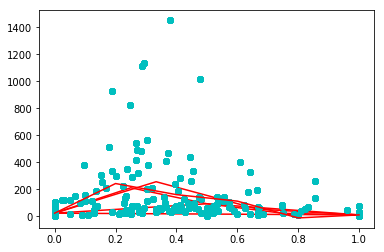

In [250]:
x_tr,t_tr=z[u'补单率'].as_matrix(),z[u'建单数量'].as_matrix()
coeff = np.polyfit(x_tr, t_tr, len(z))
f = np.poly1d(coeff)
for i in range(1,7):
    xx = np.linspace(0, 1, i)
    plt.plot(x_tr,t_tr,'co')
    plt.plot(xx, f(xx), 'r')



In [34]:
x_tr,t_tr=ax_coedd(z.as_matrix(),N=len(z[0]),Ms=range(8))
my_Erms(x_tr,t_tr=z.as_matrix())

KeyError: 0

In [2]:
%store -r x
tmp=x.dropna()
ax_coedd(tmp.as_matrix(),N=len(tmp),Ms=range(6))
x_tr,t_tr=ax_coedd(tmp.as_matrix(),N=len(tmp),Ms=range(3))
my_Erms(x_tr,t_tr=tmp.as_matrix())


NameError: name 'ax_coedd' is not defined

(array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
 array([ 0.20673887,  0.72381577,  1.05964451,  1.04460017,  0.61849575,
        -0.48559223, -0.61698594, -1.2104074 , -0.9275115 , -0.35453393]))

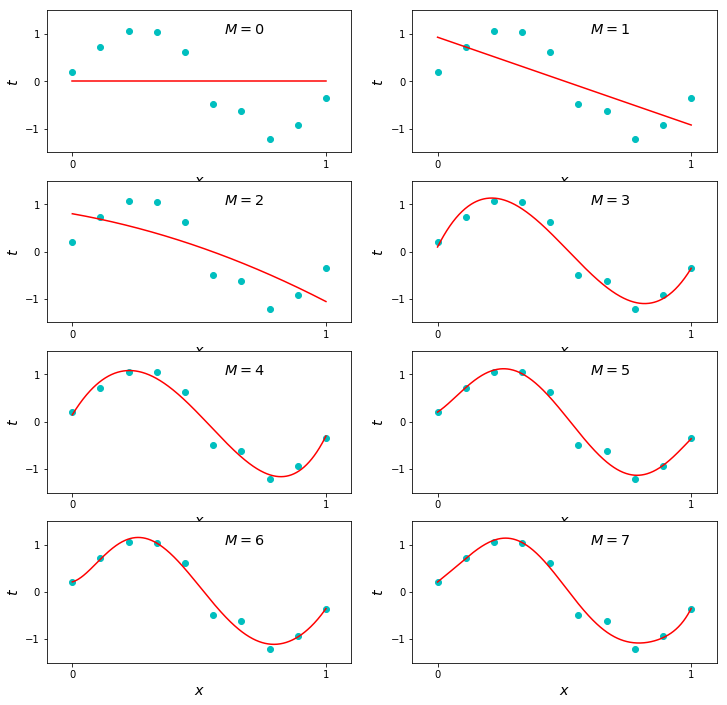

In [99]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
def ax_coedd(t_tr = np.sin(2 * np.pi * np.linspace(0, 1, 10)) + 0.25 * np.random.randn(10),N = 10,Ms = range(1,9)):
#     N = 10
    x_tr = np.linspace(0, 1, N)
#     t_tr = np.sin(2 * np.pi * x_tr) + 0.25 * np.random.randn(N)
#     Ms = range(1,9)
    fig, axes = plt.subplots((Ms[-1]-1)/2, 2, figsize=(12, 12))

    axes = axes.flatten()


    for ax, M in zip(axes, Ms):
        # 计算参数
        coeff = np.polyfit(x_tr, t_tr, M)

        # 生成函数 y(x, w)
        f = np.poly1d(coeff)

        # 绘图
        xx = np.linspace(0, 1, 500)
        ax.plot(x_tr, t_tr, 'co')
#         ax.plot(xx, np.sin(2 * np.pi * xx), 'g')
        ax.plot(xx, f(xx), 'r')
        ax.set_xlim(-0.1, 1.1)
        ax.set_ylim(-1.5, 1.5)
        ax.set_xticks([0, 1])
        ax.set_yticks([-1, 0, 1])
        ax.set_xlabel("$x$",fontsize="x-large")
        ax.set_ylabel("$t$",fontsize="x-large")
        ax.text(0.6, 1, '$M={}$'.format(M), fontsize="x-large")

#     plt.show()
    return x_tr,t_tr
ax_coedd(Ms=range(10))

In [216]:
for i in range(10):print i

0
1
2
3
4
5
6
7
8
9


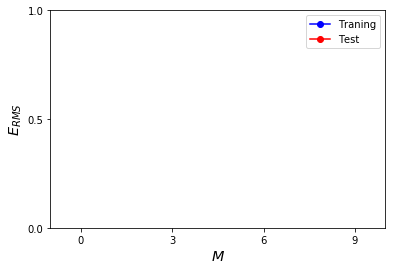

In [202]:
def my_Erms(x_tr,t_tr,t_te = np.sin(2 * np.pi * np.random.rand(100)) + 0.25 * np.random.randn(100)):
    x_te = np.random.rand(100)
    # t_te = np.sin(2 * np.pi * x_te) + 0.25 * np.random.randn(100)
    rms_tr, rms_te = [], []
    for M in xrange(10):
        # 计算参数
        coeff = np.polyfit(x_tr, t_tr, M)
        # 生成函数 y(x, w)
        f = np.poly1d(coeff)

        # RMS
        rms_tr.append(np.sqrt(((f(x_tr) - t_tr) ** 2).sum() / x_tr.shape[0]))
        rms_te.append(np.sqrt(((f(x_te) - t_te) ** 2).sum() / x_te.shape[0]))

    # 画图
    fig, ax = plt.subplots()

    ax.plot(range(10), rms_tr, 'bo-', range(10), rms_te, 'ro-')
    ax.set_xlim(-1, 10)
    ax.set_ylim(0, 1)
    ax.set_xticks(xrange(0, 10, 3))
    ax.set_yticks([0, 0.5, 1])
    ax.set_xlabel("$M$",fontsize="x-large")
    ax.set_ylabel("$E_{RMS}$",fontsize="x-large")
    ax.legend(['Traning', 'Test'], loc="best")

#     plt.show()
# x_tr,t_tr=ax_coedd(N=10,Ms=range(10))
my_Erms(x_tr,t_tr)

In [209]:
lst=[]
for i, w in enumerate(np.polyfit(x_tr, t_tr, 50)):
#     print "w_{}, {:.2f}".format( i, w)
    lst.append(w)
min(map(abs,lst))


C:\Users\d\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


8.521827124977397

bayes

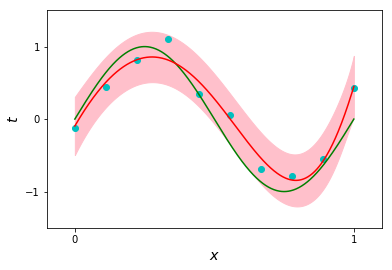

In [7]:
def phi(x, M):
    return x[:,None] ** np.arange(M + 1)

N = 10

# 生成 0，1 之间等距的 N 个 数
x_tr = np.linspace(0, 1, N)

# 计算 t
t_tr = np.sin(2 * np.pi * x_tr) + 0.25 * np.random.randn(N)

# 加正则项的解
M = 9
alpha = 5e-3
beta = 11.1
lam = alpha / beta

phi_x_tr = phi(x_tr, M)
A_0 = phi_x_tr.T.dot(phi_x_tr) + lam * np.eye(M+1)
y_0 = t_tr.dot(phi_x_tr)

# 求解 Aw=y
coeff = np.linalg.solve(A_0, y_0)[::-1]

f = np.poly1d(coeff)

# 绘图

xx = np.linspace(0, 1, 500)

# Bayes估计的均值和标准差
S = np.linalg.inv(A_0 * beta)

m_xx = beta * phi(xx, M).dot(S).dot(y_0)
s_xx = np.sqrt(1 / beta + phi(xx, M).dot(S).dot(phi(xx, M).T).diagonal())


fig, ax = plt.subplots()
ax.plot(x_tr, t_tr, 'co')
ax.plot(xx, np.sin(2 * np.pi * xx), 'g')
ax.plot(xx, f(xx), 'r')
ax.fill_between(xx, m_xx-s_xx, m_xx+s_xx, color="pink")
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-1.5, 1.5)
ax.set_xticks([0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_xlabel("$x$", fontsize="x-large")
ax.set_ylabel("$t$", fontsize="x-large")

plt.show()

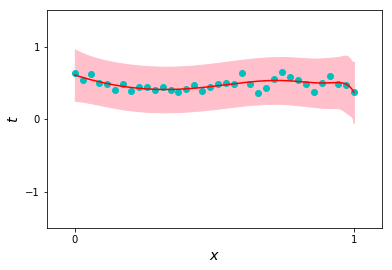

In [9]:
def phi(x, M):
    return x[:,None] ** np.arange(M + 1)
def my_bayes(t_tr = np.sin(2 * np.pi *  np.linspace(0, 1, 10)) + 0.25 * np.random.randn(10),N = 10):
    # 生成 0，1 之间等距的 N 个 数
    x_tr = np.linspace(0, 1, N)

    # 计算 t
#     t_tr = np.sin(2 * np.pi * x_tr) + 0.25 * np.random.randn(N)

    # 加正则项的解
    M = N-1
    alpha = 5e-3
    beta = 11.1
    lam = alpha / beta

    phi_x_tr = phi(x_tr, M)
    A_0 = phi_x_tr.T.dot(phi_x_tr) + lam * np.eye(M+1)
    y_0 = t_tr.dot(phi_x_tr)

    # 求解 Aw=y
    coeff = np.linalg.solve(A_0, y_0)[::-1]

    f = np.poly1d(coeff)

    # 绘图

    xx = np.linspace(0, 1, 500)

    # Bayes估计的均值和标准差
    S = np.linalg.inv(A_0 * beta)

    m_xx = beta * phi(xx, M).dot(S).dot(y_0)
    s_xx = np.sqrt(1 / beta + phi(xx, M).dot(S).dot(phi(xx, M).T).diagonal())


    fig, ax = plt.subplots()
    ax.plot(x_tr, t_tr, 'co')
#     ax.plot(xx, np.sin(2 * np.pi * xx), 'g')
    ax.plot(xx, f(xx), 'r')
    ax.fill_between(xx, m_xx-s_xx, m_xx+s_xx, color="pink")
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xticks([0, 1])
    ax.set_yticks([-1, 0, 1])
    ax.set_xlabel("$x$", fontsize="x-large")
    ax.set_ylabel("$t$", fontsize="x-large")

    plt.show()
my_bayes(tmp.as_matrix(),len(tmp))

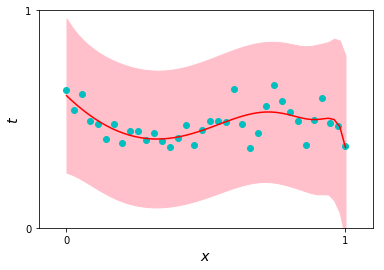

In [258]:
def my_bayes(t_tr = np.sin(2 * np.pi *  np.linspace(0, 1, 10)) + 0.25 * np.random.randn(10),N = 10):
    # 生成 0，1 之间等距的 N 个 数
    x_tr = np.linspace(0, 1, N)

    # 计算 t
#     t_tr = np.sin(2 * np.pi * x_tr) + 0.25 * np.random.randn(N)

    # 加正则项的解
    M = N-1
    alpha = 5e-3
    beta = 11.1
    lam = alpha / beta

    phi_x_tr = phi(x_tr, M)
    A_0 = phi_x_tr.T.dot(phi_x_tr) + lam * np.eye(M+1)
    y_0 = t_tr.dot(phi_x_tr)

    # 求解 Aw=y
    coeff = np.linalg.solve(A_0, y_0)[::-1]

    f = np.poly1d(coeff)

    # 绘图

    xx = np.linspace(0, 1, 50)

    # Bayes估计的均值和标准差
    S = np.linalg.inv(A_0 * beta)

    m_xx = beta * phi(xx, M).dot(S).dot(y_0)
    s_xx = np.sqrt(1 / beta + phi(xx, M).dot(S).dot(phi(xx, M).T).diagonal())


    fig, ax = plt.subplots()
    ax.plot(x_tr, t_tr, 'co')
#     ax.plot(xx, np.sin(2 * np.pi * xx), 'g')
    ax.plot(xx, f(xx), 'r')
    ax.fill_between(xx, m_xx-s_xx, m_xx+s_xx, color="pink")
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(0, 1.)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xlabel("$x$", fontsize="x-large")
    ax.set_ylabel("$t$", fontsize="x-large")

    plt.show()
my_bayes(tmp.as_matrix(),len(tmp))